In [1]:
# Importacoes das Bibliotecas

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import os
import zipfile
#import kaggle

# id e senha kaggle pelo os
# os.environ['KAGGLE_USERNAME'] = 'kaggle username'
# os.environ['KAGGLE_KEY'] = 'kaggle key'

In [ ]:
# Importar database netflix-shows do Kaggle
!kaggle datasets download -d shivamb/netflix-shows

In [ ]:
# Extrair o arquivo do .zip baixado
zipfile_name = 'netflix-shows.zip'
with zipfile.ZipFile(zipfile_name, 'r') as file:
    file.extractall()

In [3]:
# Ler o csv para um DataFrame do Pandas
raw_data = pd.read_csv('netflix_titles.csv')

In [186]:
# Explorar o arquivo
raw_data

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...
...,...,...,...,...,...,...,...,...,...,...,...,...
8802,s8803,Movie,Zodiac,David Fincher,"Mark Ruffalo, Jake Gyllenhaal, Robert Downey J...",United States,"November 20, 2019",2007,R,158 min,"Cult Movies, Dramas, Thrillers","A political cartoonist, a crime reporter and a..."
8803,s8804,TV Show,Zombie Dumb,NaN,NaN,NaN,"July 1, 2019",2018,TV-Y7,2 Seasons,"Kids' TV, Korean TV Shows, TV Comedies","While living alone in a spooky town, a young g..."
8804,s8805,Movie,Zombieland,Ruben Fleischer,"Jesse Eisenberg, Woody Harrelson, Emma Stone, ...",United States,"November 1, 2019",2009,R,88 min,"Comedies, Horror Movies",Looking to survive in a world taken over by zo...
8805,s8806,Movie,Zoom,Peter Hewitt,"Tim Allen, Courteney Cox, Chevy Chase, Kate Ma...",United States,"January 11, 2020",2006,PG,88 min,"Children & Family Movies, Comedies","Dragged from civilian life, a former superhero..."


In [187]:
# Linhas e colunas: 8807, 12
raw_data.shape

(8807, 12)

In [188]:
# Objetivo inicial:
## Qual tipo de conteúdo o Brasil mais produziu, ou participou na produçao, para a Netflix?
## Qual a progressão da produção de conteúdo brasileiro ao longo do tempo?
## Que tipo de filmes o Brasil mais produziu?
## Qual a progressão da produção de filmes brasileiros ao longo do tempo?
## Que tipo de séries o Brasil mais produziu?
## Qual tipo de público (classificacao indicativa) o Brasil mais tem focado? Em séries e filmes
## Existe uma relacao entre ano de lancamento e duracao de um filme?
## Existe uma relacao entre ano de lancamento e duracao de uma série?

# Que tipo de informação precisamos?
## Shows que possuam 'Brazil' listado ('country')
## Tipos de cada conteúdo ('type')
## Categorias de cada conteúdo ('listed_in')
## Classificacao indicativa ('rating')
## Duracao de cada filme e série ('duration')


# Colunas necessárias:
## country, listed_in, type, release_year, rating, duration

In [189]:
# Alguns valores possuem uma lista de países.
raw_data['country'].value_counts()

United States                             2818
India                                      972
United Kingdom                             419
Japan                                      245
South Korea                                199
                                          ... 
Romania, Bulgaria, Hungary                   1
Uruguay, Guatemala                           1
France, Senegal, Belgium                     1
Mexico, United States, Spain, Colombia       1
United Arab Emirates, Jordan                 1
Name: country, Length: 748, dtype: int64

In [190]:
# Mostra inicialmente 77 linhas, mas é possivel que esteja ignorando as listas
raw_data.query('country == "Brazil"')

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
302,s303,Movie,City of God: 10 Years Later,"Cavi Borges, Luciano Vidigal",NaN,Brazil,"August 5, 2021",2013,TV-MA,69 min,"Documentaries, International Movies","A decade after the seminal Brazilian film ""Cit..."
650,s651,Movie,O Vendedor de Sonhos,Jayme Monjardim,"César Troncoso, Dan Stulbach, Thiago Mendonça,...",Brazil,"June 22, 2021",2016,TV-14,96 min,"Dramas, International Movies",A disillusioned psychologist tries to commit s...
783,s784,Movie,Carnaval,Leandro Neri,"Giovana Cordeiro, Gkay, Bruna Inocencio, Samya...",Brazil,"June 2, 2021",2021,TV-MA,95 min,"Comedies, International Movies, Music & Musicals","After a breakup, an influencer takes her frien..."
966,s967,Movie,Get the Grift,Pedro Antonio,"Marcus Majella, Samantha Schmütz, Caito Mainie...",Brazil,"April 28, 2021",2021,TV-MA,95 min,"Comedies, International Movies","After a botched scam, Clóvis bumps into Lohane..."
1188,s1189,Movie,Get the Goat,Vitor Brandt,"Matheus Nachtergaele, Edmilson Filho, Letícia ...",Brazil,"March 18, 2021",2021,TV-14,98 min,"Action & Adventure, Comedies, International Mo...",Two hapless cops find themselves in over their...
...,...,...,...,...,...,...,...,...,...,...,...,...
7818,s7819,Movie,Radical: the Controversial Saga of Dada Figuei...,Raphael Erichsen,NaN,Brazil,"April 12, 2017",2013,TV-MA,71 min,"Documentaries, International Movies, Sports Mo...",This film chronicles the career of surfer Dadá...
8108,s8109,Movie,Stronger Than the World,Afonso Poyart,"José Loreto, Cleo Pires, Milhem Cortaz, Jackso...",Brazil,"February 11, 2017",2016,NR,123 min,"Action & Adventure, Dramas, International Movies","After a tough upbringing, natural-born fighter..."
8207,s8208,TV Show,The Beginning of Life: The Series,Estela Renner,NaN,Brazil,"November 11, 2016",2016,TV-PG,1 Season,"Docuseries, International TV Shows, Science & ...",Using breakthroughs in technology and neurosci...
8300,s8301,Movie,The First Temptation of Christ,Rodrigo Van Der Put,"Gregorio Duvivier, Fábio Porchat, Antonio Tabe...",Brazil,"December 3, 2019",2019,TV-MA,46 min,"Comedies, International Movies","Jesus, who's hitting the big 3-0, brings a sur..."


In [191]:
# Copiar raw_data   

data_split = raw_data.copy()

In [192]:
# Dividir os valores da coluna 'country' em uma lista de países
data_split['country'] = data_split['country'].str.split(', ')

# Cria uma nova linha para cada país
data_split = data_split.explode('country')

In [193]:
# Value counts de cada país
data_split['country'].value_counts()

United States     3689
India             1046
United Kingdom     804
Canada             445
France             393
                  ... 
Bermuda              1
Ecuador              1
Armenia              1
Mongolia             1
Montenegro           1
Name: country, Length: 127, dtype: int64

In [194]:
# Nova tabela

data_split.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [195]:
# 97 produçoes com participação do Brasil
data_split.query('country == "Brazil"')

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
270,s271,Movie,Beckett,Ferdinando Cito Filomarino,"John David Washington, Boyd Holbrook, Alicia V...",Brazil,"August 13, 2021",2021,TV-MA,110 min,Action & Adventure,An American tourist goes on the run in Greece ...
302,s303,Movie,City of God: 10 Years Later,"Cavi Borges, Luciano Vidigal",NaN,Brazil,"August 5, 2021",2013,TV-MA,69 min,"Documentaries, International Movies","A decade after the seminal Brazilian film ""Cit..."
650,s651,Movie,O Vendedor de Sonhos,Jayme Monjardim,"César Troncoso, Dan Stulbach, Thiago Mendonça,...",Brazil,"June 22, 2021",2016,TV-14,96 min,"Dramas, International Movies",A disillusioned psychologist tries to commit s...
783,s784,Movie,Carnaval,Leandro Neri,"Giovana Cordeiro, Gkay, Bruna Inocencio, Samya...",Brazil,"June 2, 2021",2021,TV-MA,95 min,"Comedies, International Movies, Music & Musicals","After a breakup, an influencer takes her frien..."
894,s895,Movie,Dance of the Forty One,David Pablos,"Alfonso Herrera, Emiliano Zurita, Mabel Cadena...",Brazil,"May 12, 2021",2021,TV-MA,99 min,"Dramas, Independent Movies, International Movies",A gay congressman marries the Mexican presiden...
...,...,...,...,...,...,...,...,...,...,...,...,...
8207,s8208,TV Show,The Beginning of Life: The Series,Estela Renner,NaN,Brazil,"November 11, 2016",2016,TV-PG,1 Season,"Docuseries, International TV Shows, Science & ...",Using breakthroughs in technology and neurosci...
8300,s8301,Movie,The First Temptation of Christ,Rodrigo Van Der Put,"Gregorio Duvivier, Fábio Porchat, Antonio Tabe...",Brazil,"December 3, 2019",2019,TV-MA,46 min,"Comedies, International Movies","Jesus, who's hitting the big 3-0, brings a sur..."
8386,s8387,Movie,The Last Hangover,Rodrigo Van Der Put,"Fábio Porchat, Gregório Duvivier, Antonio Tabe...",Brazil,"December 21, 2018",2018,TV-MA,44 min,"Comedies, International Movies","In this biblical ""Hangover"" spoof, the apostle..."
8617,s8618,Movie,Trash,Stephen Daldry,"Wagner Moura, Martin Sheen, Rooney Mara, Selto...",Brazil,"January 1, 2019",2014,R,114 min,"Dramas, Independent Movies, Thrillers",Three poor Brazilian teens find something susp...


In [196]:
# Criacao da tabela data_brazil
data_brazil = data_split.query('country == "Brazil"')
data_brazil = data_brazil.reset_index(drop=True)

In [197]:
# Verificando a tabela

data_brazil

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s271,Movie,Beckett,Ferdinando Cito Filomarino,"John David Washington, Boyd Holbrook, Alicia V...",Brazil,"August 13, 2021",2021,TV-MA,110 min,Action & Adventure,An American tourist goes on the run in Greece ...
1,s303,Movie,City of God: 10 Years Later,"Cavi Borges, Luciano Vidigal",NaN,Brazil,"August 5, 2021",2013,TV-MA,69 min,"Documentaries, International Movies","A decade after the seminal Brazilian film ""Cit..."
2,s651,Movie,O Vendedor de Sonhos,Jayme Monjardim,"César Troncoso, Dan Stulbach, Thiago Mendonça,...",Brazil,"June 22, 2021",2016,TV-14,96 min,"Dramas, International Movies",A disillusioned psychologist tries to commit s...
3,s784,Movie,Carnaval,Leandro Neri,"Giovana Cordeiro, Gkay, Bruna Inocencio, Samya...",Brazil,"June 2, 2021",2021,TV-MA,95 min,"Comedies, International Movies, Music & Musicals","After a breakup, an influencer takes her frien..."
4,s895,Movie,Dance of the Forty One,David Pablos,"Alfonso Herrera, Emiliano Zurita, Mabel Cadena...",Brazil,"May 12, 2021",2021,TV-MA,99 min,"Dramas, Independent Movies, International Movies",A gay congressman marries the Mexican presiden...
...,...,...,...,...,...,...,...,...,...,...,...,...
92,s8208,TV Show,The Beginning of Life: The Series,Estela Renner,NaN,Brazil,"November 11, 2016",2016,TV-PG,1 Season,"Docuseries, International TV Shows, Science & ...",Using breakthroughs in technology and neurosci...
93,s8301,Movie,The First Temptation of Christ,Rodrigo Van Der Put,"Gregorio Duvivier, Fábio Porchat, Antonio Tabe...",Brazil,"December 3, 2019",2019,TV-MA,46 min,"Comedies, International Movies","Jesus, who's hitting the big 3-0, brings a sur..."
94,s8387,Movie,The Last Hangover,Rodrigo Van Der Put,"Fábio Porchat, Gregório Duvivier, Antonio Tabe...",Brazil,"December 21, 2018",2018,TV-MA,44 min,"Comedies, International Movies","In this biblical ""Hangover"" spoof, the apostle..."
95,s8618,Movie,Trash,Stephen Daldry,"Wagner Moura, Martin Sheen, Rooney Mara, Selto...",Brazil,"January 1, 2019",2014,R,114 min,"Dramas, Independent Movies, Thrillers",Three poor Brazilian teens find something susp...


In [198]:
# Há muitas categorias agrupadas, vai ser necessário quebrar essas listas.

data_brazil['listed_in'].value_counts()

Stand-Up Comedy                                                      9
Dramas, Independent Movies, International Movies                     8
Documentaries, International Movies                                  6
Crime TV Shows, International TV Shows, TV Dramas                    5
Dramas, International Movies                                         4
Comedies, International Movies                                       4
Comedies, Dramas, International Movies                               3
Dramas, Faith & Spirituality, International Movies                   3
Children & Family Movies, Comedies, Music & Musicals                 3
International TV Shows, TV Comedies                                  3
Docuseries, International TV Shows                                   2
International TV Shows, TV Dramas, TV Mysteries                      2
Comedies, Dramas, Independent Movies                                 2
Children & Family Movies                                             2
Comedi

In [199]:
# Contagem de valores pra cada type

data_brazil['type'].value_counts()

Movie      66
TV Show    31
Name: type, dtype: int64

In [200]:
# Criando cópia

brazil_split = data_brazil.copy()

In [201]:
# Quebrando as listas em listed_in e criando uma linha nova pra cada valor

brazil_split['listed_in'] = brazil_split['listed_in'].str.split(', ')

brazil_split = brazil_split.explode('listed_in')


In [202]:
brazil_split

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s271,Movie,Beckett,Ferdinando Cito Filomarino,"John David Washington, Boyd Holbrook, Alicia V...",Brazil,"August 13, 2021",2021,TV-MA,110 min,Action & Adventure,An American tourist goes on the run in Greece ...
1,s303,Movie,City of God: 10 Years Later,"Cavi Borges, Luciano Vidigal",NaN,Brazil,"August 5, 2021",2013,TV-MA,69 min,Documentaries,"A decade after the seminal Brazilian film ""Cit..."
1,s303,Movie,City of God: 10 Years Later,"Cavi Borges, Luciano Vidigal",NaN,Brazil,"August 5, 2021",2013,TV-MA,69 min,International Movies,"A decade after the seminal Brazilian film ""Cit..."
2,s651,Movie,O Vendedor de Sonhos,Jayme Monjardim,"César Troncoso, Dan Stulbach, Thiago Mendonça,...",Brazil,"June 22, 2021",2016,TV-14,96 min,Dramas,A disillusioned psychologist tries to commit s...
2,s651,Movie,O Vendedor de Sonhos,Jayme Monjardim,"César Troncoso, Dan Stulbach, Thiago Mendonça,...",Brazil,"June 22, 2021",2016,TV-14,96 min,International Movies,A disillusioned psychologist tries to commit s...
...,...,...,...,...,...,...,...,...,...,...,...,...
94,s8387,Movie,The Last Hangover,Rodrigo Van Der Put,"Fábio Porchat, Gregório Duvivier, Antonio Tabe...",Brazil,"December 21, 2018",2018,TV-MA,44 min,International Movies,"In this biblical ""Hangover"" spoof, the apostle..."
95,s8618,Movie,Trash,Stephen Daldry,"Wagner Moura, Martin Sheen, Rooney Mara, Selto...",Brazil,"January 1, 2019",2014,R,114 min,Dramas,Three poor Brazilian teens find something susp...
95,s8618,Movie,Trash,Stephen Daldry,"Wagner Moura, Martin Sheen, Rooney Mara, Selto...",Brazil,"January 1, 2019",2014,R,114 min,Independent Movies,Three poor Brazilian teens find something susp...
95,s8618,Movie,Trash,Stephen Daldry,"Wagner Moura, Martin Sheen, Rooney Mara, Selto...",Brazil,"January 1, 2019",2014,R,114 min,Thrillers,Three poor Brazilian teens find something susp...


In [224]:
## Tratamento dos valores duration e release_year

brazil_split['release_year'] = pd.to_numeric(brazil_split['release_year'], errors='coerce')


/var/folders/l0/grx7fmx51kx9h6jq07pccfrw0000gn/T/ipykernel_1346/863429374.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  brazil_split['release_year'] = pd.to_numeric(brazil_split['release_year'], errors='coerce')


In [225]:
# Checagem dos valores pra cada Categoria

brazil_split['listed_in'].value_counts()

Dramas                                    26
Comédias                                  20
Documentários                             12
Filmes Independentes                      12
Séries de Drama                           11
Stand-Up Comedy                            9
Filmes para Crianças e Família             7
Séries de Comédia                          6
Docusséries                                6
Séries de Crime                            6
Ação e Aventura                            5
Séries de Mistério                         5
Reality Show                               5
Música e Musicais                          5
Fé e Espiritualidade                       4
Filmes LGBTQ+                              3
Suspense                                   3
Programas Infantis                         3
Séries de Ficção Científica e Fantasia     2
Séries de Ciência e Natureza               2
Séries Românticas                          2
Séries de Terror                           2
Filmes Rom

In [226]:
# Dropando International Movies e International TV Shows, pois são redundantes

values_to_drop = ['International Movies','International TV Shows']

brazil_split = brazil_split.loc[~brazil_split['listed_in'].isin(values_to_drop)]

In [227]:
# Traduzindo pro portugues

## Classificacao indicativa:
rating_br = {
   'TV-MA': '18 anos',
    'TV-14': '16 anos',
    'TV-PG': '12 anos',
    'TV-G': 'Livre',
    'R': 'Restrito (menores de 17 anos)',
    'TV-Y': 'Livre ou 10 anos',
    'PG': '10 anos ou 12 anos',
    'NR': 'Não Classificado',
    'PG-13': '14 anos',
    'TV-Y7': '10 anos ou 12 anos'
}

brazil_split['rating'] = brazil_split['rating'].replace(rating_br)

## Tipo:
type_br = {
    'Movie':'Filmes',
    'TV Show':'Series'
}

brazil_split['type'] = brazil_split['type'].replace(type_br)


## Categorias
listed_in_br = {
    'Dramas': 'Dramas',
    'Comedies': 'Comédias',
    'Documentaries': 'Documentários',
    'Independent Movies': 'Filmes Independentes',
    'TV Dramas': 'Séries de Drama',
    'Stand-Up Comedy': 'Stand-Up Comedy',
    'Children & Family Movies': 'Filmes para Crianças e Família',
    'TV Comedies': 'Séries de Comédia',
    'Docuseries': 'Docusséries',
    'Crime TV Shows': 'Séries de Crime',
    'TV Mysteries': 'Séries de Mistério',
    'Action & Adventure': 'Ação e Aventura',
    'Reality TV': 'Reality Show',
    'Music & Musicals': 'Música e Musicais',
    'Faith & Spirituality': 'Fé e Espiritualidade',
    'Thrillers': 'Suspense',
    "Kids' TV": 'Programas Infantis',
    'LGBTQ Movies': 'Filmes LGBTQ+',
    'TV Horror': 'Séries de Terror',
    'Romantic Movies': 'Filmes Românticos',
    'Romantic TV Shows': 'Séries Românticas',
    'Science & Nature TV': 'Séries de Ciência e Natureza',
    'TV Sci-Fi & Fantasy': 'Séries de Ficção Científica e Fantasia',
    'Sports Movies': 'Filmes de Esporte',
    'Stand-Up Comedy & Talk Shows': 'Stand-Up Comedy e Talk Shows'
}

brazil_split['listed_in'] = brazil_split['listed_in'].replace(listed_in_br)


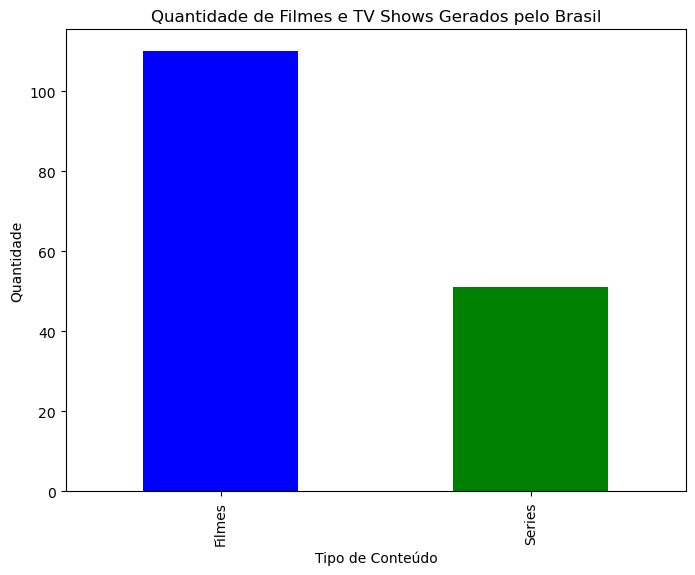

In [228]:
## Qual tipo de conteúdo o Brasil mais produziu, ou participou na produçao, para a Netflix?

type_count = brazil_split['type'].value_counts()

# Criando  gráfico de barras
plt.figure(figsize=(8, 6))
type_count.plot(kind='bar', color=['blue', 'green'])
plt.title('Quantidade de Filmes e TV Shows Gerados pelo Brasil')
plt.xlabel('Tipo de Conteúdo')
plt.ylabel('Quantidade')

# Exibir o gráfico
plt.show()


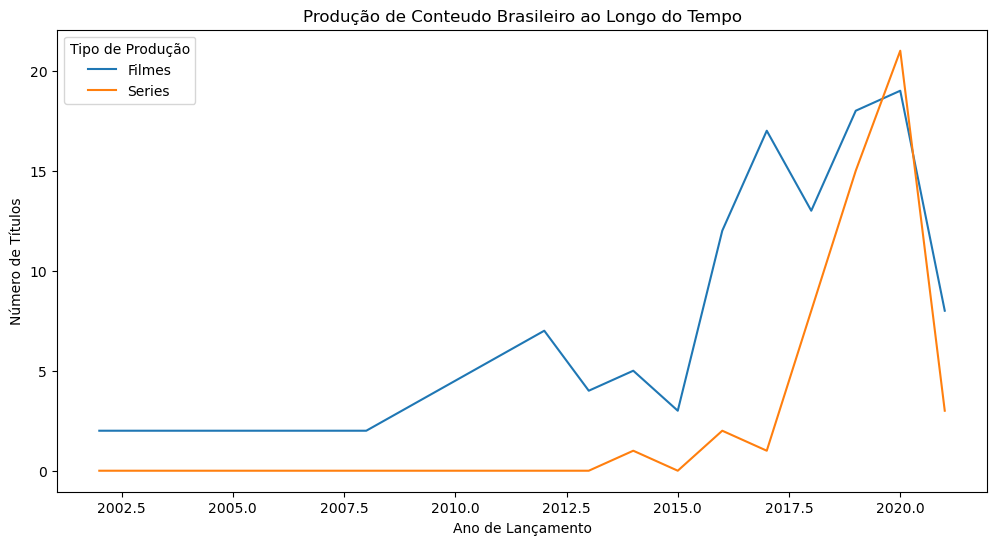

<Figure size 640x480 with 0 Axes>

In [229]:
## Qual a progressão da produção de conteúdo brasileiro ao longo do tempo?

brazil_type = brazil_split.groupby(['release_year','type']).size().unstack(fill_value=0)

# Criando  gráfico de linhas
brazil_type.plot(kind='line', figsize=(12,6))
plt.title('Produção de Conteudo Brasileiro ao Longo do Tempo')
plt.xlabel('Ano de Lançamento')
plt.ylabel('Número de Títulos')
plt.legend(title='Tipo de Produção')
plt.show()
plt.clf()

In [230]:
# Criacao de 2 novas tabelas, separadas pelo tipo principal

brazil_movies = brazil_split.query('type == "Filmes"')
brazil_tv_show = brazil_split.query('type == "Series"')

In [231]:
# Conferindo a tabela brazil_movies com 153 linhas

brazil_movies.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s271,Filmes,Beckett,Ferdinando Cito Filomarino,"John David Washington, Boyd Holbrook, Alicia V...",Brazil,"August 13, 2021",2021,18 anos,110 min,Ação e Aventura,An American tourist goes on the run in Greece ...
1,s303,Filmes,City of God: 10 Years Later,"Cavi Borges, Luciano Vidigal",NaN,Brazil,"August 5, 2021",2013,18 anos,69 min,Documentários,"A decade after the seminal Brazilian film ""Cit..."
2,s651,Filmes,O Vendedor de Sonhos,Jayme Monjardim,"César Troncoso, Dan Stulbach, Thiago Mendonça,...",Brazil,"June 22, 2021",2016,16 anos,96 min,Dramas,A disillusioned psychologist tries to commit s...
3,s784,Filmes,Carnaval,Leandro Neri,"Giovana Cordeiro, Gkay, Bruna Inocencio, Samya...",Brazil,"June 2, 2021",2021,18 anos,95 min,Comédias,"After a breakup, an influencer takes her frien..."
3,s784,Filmes,Carnaval,Leandro Neri,"Giovana Cordeiro, Gkay, Bruna Inocencio, Samya...",Brazil,"June 2, 2021",2021,18 anos,95 min,Música e Musicais,"After a breakup, an influencer takes her frien..."


In [232]:
# Conferindo a tabela brazil_tv_show com 77 linhas

brazil_tv_show.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
6,s1076,Series,My Love: Six Stories of True Love,"Moyoung Jin, Caroline Sá, Deepti Kakkar, Fahad...",NaN,Brazil,"April 13, 2021",2021,12 anos,1 Season,Docusséries,Six longtime couples in different parts of the...
9,s1340,Series,Invisible City,NaN,"Marco Pigossi, Alessandra Negrini, Fábio Lago,...",Brazil,"February 5, 2021",2021,18 anos,1 Season,Séries de Crime,"After a family tragedy, a man discovers mythic..."
9,s1340,Series,Invisible City,NaN,"Marco Pigossi, Alessandra Negrini, Fábio Lago,...",Brazil,"February 5, 2021",2021,18 anos,1 Season,Séries de Drama,"After a family tragedy, a man discovers mythic..."
11,s1533,Series,Anitta: Made In Honório,"Andrucha Waddington, Pedro Waddington",Anitta,Brazil,"December 16, 2020",2020,18 anos,1 Season,Docusséries,"In this intimate documentary, Brazilian pop qu..."
15,s1716,Series,A Queen Is Born,Carla Barros,"Gloria Groove, Alexia Twister",Brazil,"November 11, 2020",2020,16 anos,1 Season,Reality Show,Gloria Groove and Alexia Twister make drag dre...


In [233]:
# Ainda há muitas categorias, o gráfico ficaria um caos. Vou filtrar pelo top 7 
brazil_movies['listed_in'].value_counts()

Dramas                            26
Comédias                          20
Documentários                     12
Filmes Independentes              12
Stand-Up Comedy                    9
Filmes para Crianças e Família     7
Ação e Aventura                    5
Música e Musicais                  5
Fé e Espiritualidade               4
Filmes LGBTQ+                      3
Suspense                           3
Filmes Românticos                  2
Filmes de Esporte                  2
Name: listed_in, dtype: int64

In [234]:
# Criando os top movies para facilitar a visualizacao

top_categories_movies = ['Dramas','Comédias','Documentários','Filmes Independentes','Stand-up Comedy','Filmes para Crianças e Família']

top_movies =  brazil_movies[brazil_movies['listed_in'].isin(top_categories_movies)]

In [235]:
# Visualizando a nova tabela

top_movies

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
1,s303,Filmes,City of God: 10 Years Later,"Cavi Borges, Luciano Vidigal",NaN,Brazil,"August 5, 2021",2013,18 anos,69 min,Documentários,"A decade after the seminal Brazilian film ""Cit..."
2,s651,Filmes,O Vendedor de Sonhos,Jayme Monjardim,"César Troncoso, Dan Stulbach, Thiago Mendonça,...",Brazil,"June 22, 2021",2016,16 anos,96 min,Dramas,A disillusioned psychologist tries to commit s...
3,s784,Filmes,Carnaval,Leandro Neri,"Giovana Cordeiro, Gkay, Bruna Inocencio, Samya...",Brazil,"June 2, 2021",2021,18 anos,95 min,Comédias,"After a breakup, an influencer takes her frien..."
4,s895,Filmes,Dance of the Forty One,David Pablos,"Alfonso Herrera, Emiliano Zurita, Mabel Cadena...",Brazil,"May 12, 2021",2021,18 anos,99 min,Dramas,A gay congressman marries the Mexican presiden...
4,s895,Filmes,Dance of the Forty One,David Pablos,"Alfonso Herrera, Emiliano Zurita, Mabel Cadena...",Brazil,"May 12, 2021",2021,18 anos,99 min,Filmes Independentes,A gay congressman marries the Mexican presiden...
...,...,...,...,...,...,...,...,...,...,...,...,...
93,s8301,Filmes,The First Temptation of Christ,Rodrigo Van Der Put,"Gregorio Duvivier, Fábio Porchat, Antonio Tabe...",Brazil,"December 3, 2019",2019,18 anos,46 min,Comédias,"Jesus, who's hitting the big 3-0, brings a sur..."
94,s8387,Filmes,The Last Hangover,Rodrigo Van Der Put,"Fábio Porchat, Gregório Duvivier, Antonio Tabe...",Brazil,"December 21, 2018",2018,18 anos,44 min,Comédias,"In this biblical ""Hangover"" spoof, the apostle..."
95,s8618,Filmes,Trash,Stephen Daldry,"Wagner Moura, Martin Sheen, Rooney Mara, Selto...",Brazil,"January 1, 2019",2014,Restrito (menores de 17 anos),114 min,Dramas,Three poor Brazilian teens find something susp...
95,s8618,Filmes,Trash,Stephen Daldry,"Wagner Moura, Martin Sheen, Rooney Mara, Selto...",Brazil,"January 1, 2019",2014,Restrito (menores de 17 anos),114 min,Filmes Independentes,Three poor Brazilian teens find something susp...


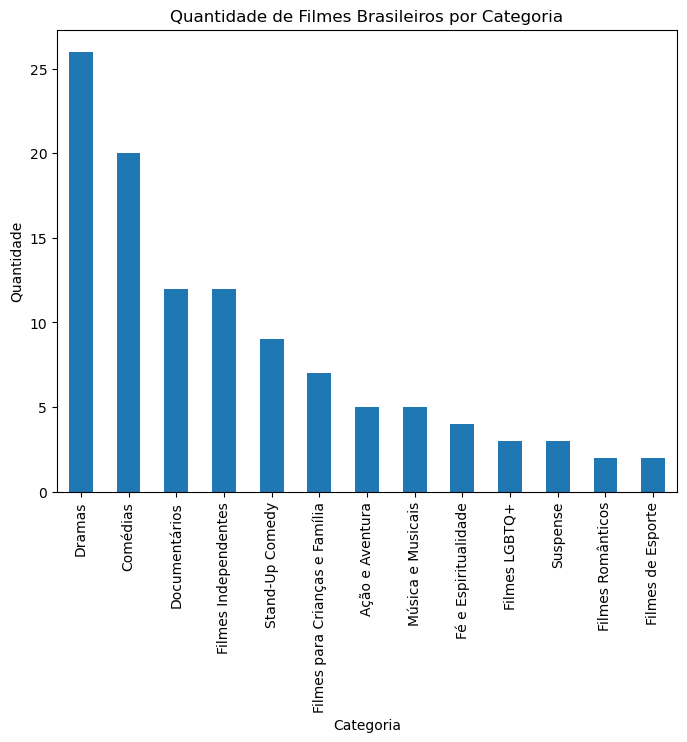

<Figure size 640x480 with 0 Axes>

In [236]:
## Que tipo de filmes o Brasil mais produziu?

movies_count = brazil_movies['listed_in'].value_counts()

# Criando  gráfico de barras
plt.figure(figsize=(8, 6))
movies_count.plot(kind='bar')
plt.title('Quantidade de Filmes Brasileiros por Categoria')
plt.xlabel('Categoria')
plt.ylabel('Quantidade')

# Exibir o gráfico
plt.show()
plt.clf()

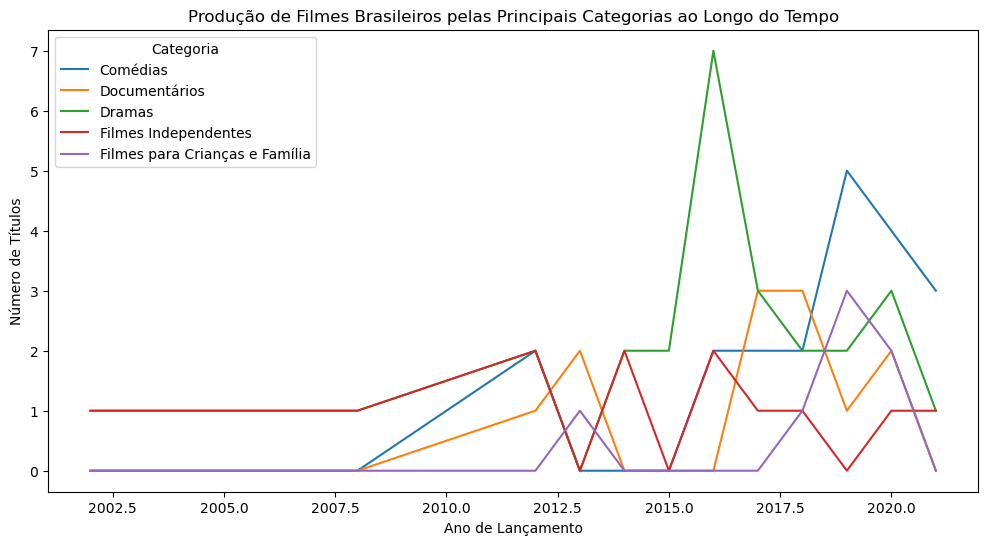

<Figure size 640x480 with 0 Axes>

In [237]:
## Qual a progressão da produção de filmes brasileiros ao longo do tempo?
movies_grouped = top_movies.groupby(['release_year','listed_in']).size().unstack(fill_value=0)

movies_grouped.plot(kind='line', figsize=(12,6))
plt.title('Produção de Filmes Brasileiros pelas Principais Categorias ao Longo do Tempo')
plt.xlabel('Ano de Lançamento')
plt.ylabel('Número de Títulos')
plt.legend(title='Categoria')
plt.show()
plt.clf()

In [238]:
# Contagem das séries 
brazil_tv_show['listed_in'].value_counts()

Séries de Drama                           11
Docusséries                                6
Séries de Crime                            6
Séries de Comédia                          6
Reality Show                               5
Séries de Mistério                         5
Programas Infantis                         3
Séries de Ficção Científica e Fantasia     2
Séries de Ciência e Natureza               2
Séries Românticas                          2
Séries de Terror                           2
Stand-Up Comedy e Talk Shows               1
Name: listed_in, dtype: int64

In [239]:
# Criando top series para facilitar a visualizacao
top_categories_shows = ['Séries de Drama', 'Séries de Crime', 'Séries de Comédia','Reality Show','Séries de Mistério']

top_shows = brazil_tv_show[brazil_tv_show['listed_in'].isin(top_categories_shows)]

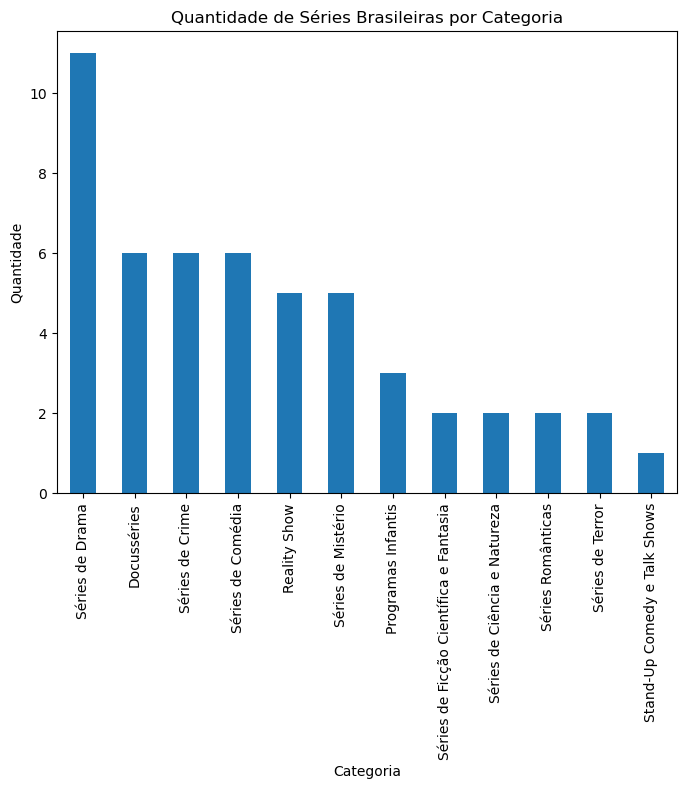

<Figure size 640x480 with 0 Axes>

In [240]:
## Que tipo de series o Brasil mais produziu?

shows_count = brazil_tv_show['listed_in'].value_counts()

# Criando  gráfico de barras
plt.figure(figsize=(8, 6))
shows_count.plot(kind='bar')
plt.title('Quantidade de Séries Brasileiras por Categoria')
plt.xlabel('Categoria')
plt.ylabel('Quantidade')

# Exibir o gráfico
plt.show()
plt.clf()

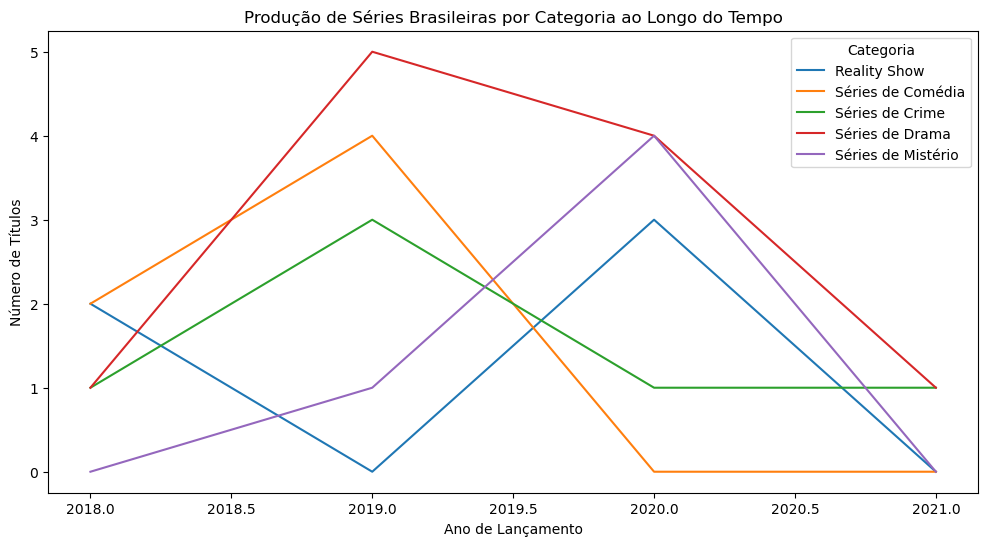

<Figure size 640x480 with 0 Axes>

In [241]:
## Qual a progressão da produção de series brasileiras ao longo do tempo?

shows_grouped = top_shows.groupby(['release_year','listed_in']).size().unstack(fill_value=0)

shows_grouped.plot(kind='line', figsize=(12,6))
plt.title('Produção de Séries Brasileiras por Categoria ao Longo do Tempo')
plt.xlabel('Ano de Lançamento')
plt.ylabel('Número de Títulos')
plt.legend(title='Categoria')
plt.show()
plt.clf()

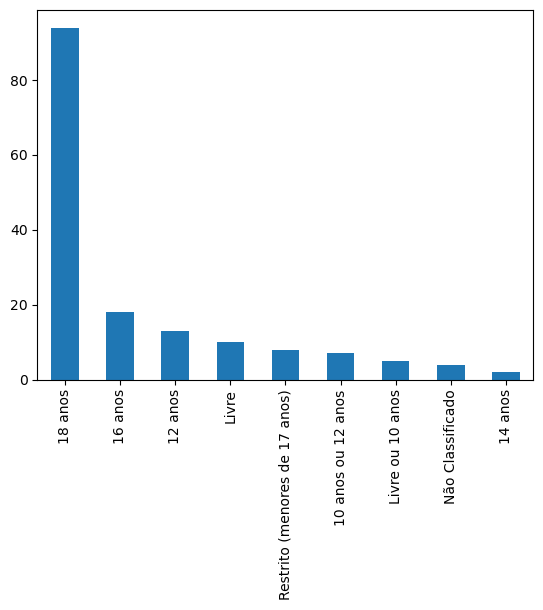

In [242]:
## Qual tipo de público (classificacao indicativa) o Brasil mais tem focado? 
rating_counts = brazil_split['rating'].value_counts()

rating_counts.plot(kind='bar')
plt.show()


In [243]:
## Existe uma relacao entre ano de lancamento e duracao de um filme? 
### Durante os anos os filmes ganharam mais minutagem? Menos? Permanecerem os mesmos?

brazil_movies

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s271,Filmes,Beckett,Ferdinando Cito Filomarino,"John David Washington, Boyd Holbrook, Alicia V...",Brazil,"August 13, 2021",2021,18 anos,110 min,Ação e Aventura,An American tourist goes on the run in Greece ...
1,s303,Filmes,City of God: 10 Years Later,"Cavi Borges, Luciano Vidigal",NaN,Brazil,"August 5, 2021",2013,18 anos,69 min,Documentários,"A decade after the seminal Brazilian film ""Cit..."
2,s651,Filmes,O Vendedor de Sonhos,Jayme Monjardim,"César Troncoso, Dan Stulbach, Thiago Mendonça,...",Brazil,"June 22, 2021",2016,16 anos,96 min,Dramas,A disillusioned psychologist tries to commit s...
3,s784,Filmes,Carnaval,Leandro Neri,"Giovana Cordeiro, Gkay, Bruna Inocencio, Samya...",Brazil,"June 2, 2021",2021,18 anos,95 min,Comédias,"After a breakup, an influencer takes her frien..."
3,s784,Filmes,Carnaval,Leandro Neri,"Giovana Cordeiro, Gkay, Bruna Inocencio, Samya...",Brazil,"June 2, 2021",2021,18 anos,95 min,Música e Musicais,"After a breakup, an influencer takes her frien..."
...,...,...,...,...,...,...,...,...,...,...,...,...
94,s8387,Filmes,The Last Hangover,Rodrigo Van Der Put,"Fábio Porchat, Gregório Duvivier, Antonio Tabe...",Brazil,"December 21, 2018",2018,18 anos,44 min,Comédias,"In this biblical ""Hangover"" spoof, the apostle..."
95,s8618,Filmes,Trash,Stephen Daldry,"Wagner Moura, Martin Sheen, Rooney Mara, Selto...",Brazil,"January 1, 2019",2014,Restrito (menores de 17 anos),114 min,Dramas,Three poor Brazilian teens find something susp...
95,s8618,Filmes,Trash,Stephen Daldry,"Wagner Moura, Martin Sheen, Rooney Mara, Selto...",Brazil,"January 1, 2019",2014,Restrito (menores de 17 anos),114 min,Filmes Independentes,Three poor Brazilian teens find something susp...
95,s8618,Filmes,Trash,Stephen Daldry,"Wagner Moura, Martin Sheen, Rooney Mara, Selto...",Brazil,"January 1, 2019",2014,Restrito (menores de 17 anos),114 min,Suspense,Three poor Brazilian teens find something susp...
